In [2]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [3]:
data_post = pd.read_csv('D:/SASTRA_AI_DS/MIni_project/Ovarian_Cancer_Diagnosis/Dataset/data_post_meno.csv')

In [4]:
data_post

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
1,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
2,3.03,24.05,76,50.4,76.0,16.0,23.0,0.04,0.50,5.05,...,0.24,15.1,1.17,205,4.61,12.8,7.4,77.0,334.2,0
3,4.00,23.29,63,44.6,71.0,14.0,23.0,0.01,0.20,4.90,...,0.19,8.8,1.38,215,3.95,14.9,6.1,69.8,325.2,0
4,NaN,16.06,65,45.6,130.0,32.0,16.0,0.04,0.70,2.25,...,0.30,10.4,1.04,306,4.33,12.3,4.4,79.6,234.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.27,19.62,65,41.3,73.0,16.0,23.0,0.03,0.70,5.23,...,0.20,10.2,1.10,200,4.55,13.5,9.1,74.4,294.0,1
115,5.84,22.80,50,45.4,55.0,18.0,19.0,0.06,0.60,5.49,...,0.24,13.1,1.11,214,3.89,11.8,10.7,70.9,266.7,1
116,4.89,9.50,67,44.0,76.0,13.0,24.0,0.04,0.60,5.86,...,0.18,17.6,1.24,141,4.59,13.6,9.2,74.9,240.3,1
117,7.43,7.10,58,45.7,83.0,12.0,14.0,0.01,0.20,5.31,...,0.22,16.9,0.93,187,5.10,12.4,10.8,79.9,373.4,1


In [5]:
data_post['Menopause'].value_counts()

Menopause
1    119
Name: count, dtype: int64

In [6]:
data_post = data_post.drop('Menopause', axis=1)

In [7]:
data_post.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,110.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,3.068818,19.237227,61.563025,39.842017,87.033613,18.436975,21.983193,0.026807,0.415378,4.487563,...,0.267933,13.901933,1.133445,275.411765,4.328151,13.178992,9.172269,70.347899,263.231933,0.193277
std,3.289260,5.171214,8.101725,6.235702,23.835571,10.918526,9.718917,0.020039,0.296724,1.553146,...,0.092797,3.243219,0.189206,121.384765,0.561786,1.485860,4.975822,7.618219,77.730319,0.396538
min,0.700000,6.200000,36.000000,22.000000,26.000000,4.000000,10.000000,0.000000,0.000000,1.120000,...,0.107000,8.800000,0.570000,98.000000,2.620000,11.370000,3.400000,48.700000,108.700000,0.000000
25%,1.852500,17.210000,57.000000,35.950000,70.500000,11.500000,16.000000,0.010000,0.200000,3.385000,...,0.210000,11.100000,1.020000,203.500000,4.015000,12.300000,6.000000,66.300000,211.600000,0.000000
50%,2.555000,20.090000,61.000000,41.100000,84.000000,16.000000,20.000000,0.020000,0.400000,4.370000,...,0.250000,13.400000,1.130000,254.000000,4.330000,12.900000,8.400000,72.000000,263.800000,0.000000
75%,3.310000,23.050000,66.500000,44.900000,98.500000,22.000000,24.000000,0.040000,0.600000,5.485000,...,0.310000,16.600000,1.245000,321.000000,4.665000,13.400000,10.450000,75.850000,306.350000,0.000000
max,34.240000,26.380000,83.000000,50.600000,154.000000,69.000000,78.000000,0.120000,1.410000,10.190000,...,0.640000,22.500000,1.670000,868.000000,6.740000,22.200000,38.300000,82.500000,616.700000,1.000000


In [8]:
data_post.isnull().sum()

AFP        9
AG         0
Age        0
ALB        0
ALP        0
ALT        0
AST        0
BASO#      0
BASO%      0
BUN        0
Ca         0
CA125      6
CA19-9     9
CA72-4    88
CEA        9
CL         0
CO2CP      0
CREA       0
DBIL       0
EO#        0
EO%        0
GGT        0
GLO        0
GLU.       0
HCT        0
HE4        8
HGB        0
IBIL       0
K          0
LYM#       0
LYM%       0
MCH        0
MCV        0
Mg         0
MONO#      0
MONO%      0
MPV        0
Na         0
NEU       14
PCT        0
PDW        0
PHOS       0
PLT        0
RBC        0
RDW        0
TBIL       0
TP         0
UA         0
TYPE       0
dtype: int64

In [9]:
data_post.shape

(119, 49)

In [10]:
age_type_df = data_post[['Age', 'TYPE', 'CA72-4', 'NEU']] 

In [11]:
data_df = data_post.drop(columns=['Age', 'TYPE','CA72-4', 'NEU'])  

In [12]:
data_df.shape

(119, 45)

MICE imputation and IQR outliers

In [13]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data_df), columns=data_df.columns)

In [14]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [18]:
outliered_data_iqr = remove_outliers_iqr(data_mice_imputed)

In [19]:
outliered_data_iqr

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,5.352500,23.98,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.6200,...,142.0,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2
1,2.750000,16.60,39.2,28.5,16.0,17.0,0.05,0.74,5.27,2.3500,...,139.1,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6
2,3.030000,24.05,50.4,76.0,16.0,23.0,0.04,0.50,5.05,2.6800,...,144.7,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2
3,4.000000,23.29,44.6,71.0,14.0,23.0,0.01,0.20,4.90,2.3500,...,141.6,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2
4,4.015635,16.06,45.6,130.0,32.0,16.0,0.04,0.70,2.25,2.6300,...,146.9,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.62,41.3,73.0,16.0,23.0,0.03,0.70,5.23,2.7100,...,140.5,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0
115,5.352500,22.80,45.4,55.0,18.0,19.0,0.06,0.60,5.49,2.6300,...,143.3,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7
116,4.890000,9.50,44.0,76.0,13.0,24.0,0.04,0.60,5.86,1.8675,...,143.0,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3
117,5.352500,8.45,45.7,83.0,12.0,14.0,0.01,0.20,5.31,1.8675,...,144.2,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4


In [20]:
# Combine columns
IQR_outlier_mice_imputer = pd.concat([outliered_data_iqr, age_type_df], axis=1)

In [21]:
IQR_outlier_mice_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,5.352500,23.98,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.6200,...,304.0,4.89,12.7,6.8,72.0,119.2,61,0,NaN,76.5
1,2.750000,16.60,39.2,28.5,16.0,17.0,0.05,0.74,5.27,2.3500,...,339.0,4.01,14.6,10.9,66.1,215.6,45,0,131.6,65.5
2,3.030000,24.05,50.4,76.0,16.0,23.0,0.04,0.50,5.05,2.6800,...,205.0,4.61,12.8,7.4,77.0,334.2,76,0,NaN,70.9
3,4.000000,23.29,44.6,71.0,14.0,23.0,0.01,0.20,4.90,2.3500,...,215.0,3.95,14.9,6.1,69.8,325.2,63,0,NaN,74.0
4,4.015635,16.06,45.6,130.0,32.0,16.0,0.04,0.70,2.25,2.6300,...,306.0,4.33,12.3,4.4,79.6,234.1,65,0,NaN,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.62,41.3,73.0,16.0,23.0,0.03,0.70,5.23,2.7100,...,200.0,4.55,13.5,9.1,74.4,294.0,65,1,NaN,NaN
115,5.352500,22.80,45.4,55.0,18.0,19.0,0.06,0.60,5.49,2.6300,...,214.0,3.89,11.8,10.7,70.9,266.7,50,1,NaN,NaN
116,4.890000,9.50,44.0,76.0,13.0,24.0,0.04,0.60,5.86,1.8675,...,141.0,4.59,13.6,9.2,74.9,240.3,67,1,NaN,NaN
117,5.352500,8.45,45.7,83.0,12.0,14.0,0.01,0.20,5.31,1.8675,...,187.0,5.10,12.4,10.8,79.9,373.4,58,1,NaN,NaN


In [22]:
IQR_outlier_mice_imputer.isnull().sum()

AFP        0
AG         0
ALB        0
ALP        0
ALT        0
AST        0
BASO#      0
BASO%      0
BUN        0
Ca         0
CA125      0
CA19-9     0
CEA        0
CL         0
CO2CP      0
CREA       0
DBIL       0
EO#        0
EO%        0
GGT        0
GLO        0
GLU.       0
HCT        0
HE4        0
HGB        0
IBIL       0
K          0
LYM#       0
LYM%       0
MCH        0
MCV        0
Mg         0
MONO#      0
MONO%      0
MPV        0
Na         0
PCT        0
PDW        0
PHOS       0
PLT        0
RBC        0
RDW        0
TBIL       0
TP         0
UA         0
Age        0
TYPE       0
CA72-4    88
NEU       14
dtype: int64

In [23]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(IQR_outlier_mice_imputer), columns=IQR_outlier_mice_imputer.columns)

In [24]:
outliered_data_iqr_mice = remove_outliers_iqr(data_mice_imputed)

In [25]:
outliered_data_iqr_mice

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,5.352500,23.98,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.6200,...,304.0,4.89,12.7,6.8,72.0,119.2,61.0,0.0,49.267947,76.500000
1,2.750000,16.60,39.2,28.5,16.0,17.0,0.05,0.74,5.27,2.3500,...,339.0,4.01,14.6,10.9,66.1,215.6,45.0,0.0,49.267947,65.500000
2,3.030000,24.05,50.4,76.0,16.0,23.0,0.04,0.50,5.05,2.6800,...,205.0,4.61,12.8,7.4,77.0,334.2,76.0,0.0,0.456774,70.900000
3,4.000000,23.29,44.6,71.0,14.0,23.0,0.01,0.20,4.90,2.3500,...,215.0,3.95,14.9,6.1,69.8,325.2,63.0,0.0,1.229566,74.000000
4,4.015635,16.06,45.6,130.0,32.0,16.0,0.04,0.70,2.25,2.6300,...,306.0,4.33,12.3,4.4,79.6,234.1,65.0,0.0,49.267947,70.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.62,41.3,73.0,16.0,23.0,0.03,0.70,5.23,2.7100,...,200.0,4.55,13.5,9.1,74.4,294.0,65.0,0.0,0.833028,70.763141
115,5.352500,22.80,45.4,55.0,18.0,19.0,0.06,0.60,5.49,2.6300,...,214.0,3.89,11.8,10.7,70.9,266.7,50.0,0.0,0.776420,82.770151
116,4.890000,9.50,44.0,76.0,13.0,24.0,0.04,0.60,5.86,1.8675,...,141.0,4.59,13.6,9.2,74.9,240.3,67.0,0.0,1.544644,64.864372
117,5.352500,8.45,45.7,83.0,12.0,14.0,0.01,0.20,5.31,1.8675,...,187.0,5.10,12.4,10.8,79.9,373.4,58.0,0.0,1.384473,65.929683


In [26]:
outliered_data_iqr_mice['Age'] = outliered_data_iqr_mice['Age'].astype(int)

In [27]:
outliered_data_iqr_mice['TYPE'] = outliered_data_iqr_mice['TYPE'].astype(int)

In [28]:
outliered_data_iqr_mice

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE,CA72-4,NEU
0,5.352500,23.98,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.6200,...,304.0,4.89,12.7,6.8,72.0,119.2,61,0,49.267947,76.500000
1,2.750000,16.60,39.2,28.5,16.0,17.0,0.05,0.74,5.27,2.3500,...,339.0,4.01,14.6,10.9,66.1,215.6,45,0,49.267947,65.500000
2,3.030000,24.05,50.4,76.0,16.0,23.0,0.04,0.50,5.05,2.6800,...,205.0,4.61,12.8,7.4,77.0,334.2,76,0,0.456774,70.900000
3,4.000000,23.29,44.6,71.0,14.0,23.0,0.01,0.20,4.90,2.3500,...,215.0,3.95,14.9,6.1,69.8,325.2,63,0,1.229566,74.000000
4,4.015635,16.06,45.6,130.0,32.0,16.0,0.04,0.70,2.25,2.6300,...,306.0,4.33,12.3,4.4,79.6,234.1,65,0,49.267947,70.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.62,41.3,73.0,16.0,23.0,0.03,0.70,5.23,2.7100,...,200.0,4.55,13.5,9.1,74.4,294.0,65,0,0.833028,70.763141
115,5.352500,22.80,45.4,55.0,18.0,19.0,0.06,0.60,5.49,2.6300,...,214.0,3.89,11.8,10.7,70.9,266.7,50,0,0.776420,82.770151
116,4.890000,9.50,44.0,76.0,13.0,24.0,0.04,0.60,5.86,1.8675,...,141.0,4.59,13.6,9.2,74.9,240.3,67,0,1.544644,64.864372
117,5.352500,8.45,45.7,83.0,12.0,14.0,0.01,0.20,5.31,1.8675,...,187.0,5.10,12.4,10.8,79.9,373.4,58,0,1.384473,65.929683


In [29]:
outliered_data_iqr_mice.columns

Index(['AFP', 'AG', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN', 'Ca',
       'CA125', 'CA19-9', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL', 'EO#', 'EO%',
       'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%',
       'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'PCT', 'PDW', 'PHOS',
       'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA', 'Age', 'TYPE', 'CA72-4',
       'NEU'],
      dtype='object')

In [30]:
outliered_data_iqr_mice.to_csv('OC_post_mice_iqr.csv',index=False)

<Axes: ylabel='NEU'>

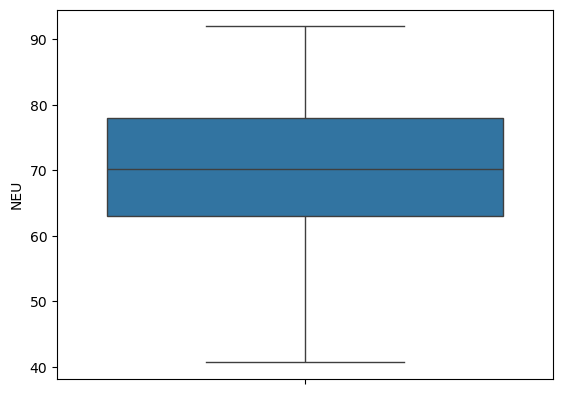

In [33]:
sns.boxplot(outliered_data_iqr_mice['NEU'])

In [10]:
data_post

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
1,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
2,3.03,24.05,76,50.4,76.0,16.0,23.0,0.04,0.50,5.05,...,0.24,15.1,1.17,205,4.61,12.8,7.4,77.0,334.2,0
3,4.00,23.29,63,44.6,71.0,14.0,23.0,0.01,0.20,4.90,...,0.19,8.8,1.38,215,3.95,14.9,6.1,69.8,325.2,0
4,NaN,16.06,65,45.6,130.0,32.0,16.0,0.04,0.70,2.25,...,0.30,10.4,1.04,306,4.33,12.3,4.4,79.6,234.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.27,19.62,65,41.3,73.0,16.0,23.0,0.03,0.70,5.23,...,0.20,10.2,1.10,200,4.55,13.5,9.1,74.4,294.0,1
115,5.84,22.80,50,45.4,55.0,18.0,19.0,0.06,0.60,5.49,...,0.24,13.1,1.11,214,3.89,11.8,10.7,70.9,266.7,1
116,4.89,9.50,67,44.0,76.0,13.0,24.0,0.04,0.60,5.86,...,0.18,17.6,1.24,141,4.59,13.6,9.2,74.9,240.3,1
117,7.43,7.10,58,45.7,83.0,12.0,14.0,0.01,0.20,5.31,...,0.22,16.9,0.93,187,5.10,12.4,10.8,79.9,373.4,1


In [11]:
age_type_df = data_post[['Age', 'TYPE']] 

In [12]:
data = data_post.drop(columns=['Age', 'TYPE','CA72-4', 'NEU'])  

MICE imputation and IQR outliers

In [14]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data), columns=data.columns)

In [15]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [16]:
outliered_data_iqr = remove_outliers_iqr(data_mice_imputed)

In [17]:
# Combine columns
IQR_outlier_mice_imputer = pd.concat([outliered_data_iqr, age_type_df], axis=1)

In [18]:
IQR_outlier_mice_imputer.isnull().sum()

AFP       0
AG        0
ALB       0
ALP       0
ALT       0
AST       0
BASO#     0
BASO%     0
BUN       0
Ca        0
CA125     0
CA19-9    0
CEA       0
CL        0
CO2CP     0
CREA      0
DBIL      0
EO#       0
EO%       0
GGT       0
GLO       0
GLU.      0
HCT       0
HE4       0
HGB       0
IBIL      0
K         0
LYM#      0
LYM%      0
MCH       0
MCV       0
Mg        0
MONO#     0
MONO%     0
MPV       0
Na        0
PCT       0
PDW       0
PHOS      0
PLT       0
RBC       0
RDW       0
TBIL      0
TP        0
UA        0
Age       0
TYPE      0
dtype: int64

In [19]:
IQR_outlier_mice_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
0,5.352500,23.98,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.6200,...,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,61,0
1,2.750000,16.60,39.2,28.5,16.0,17.0,0.05,0.74,5.27,2.3500,...,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,45,0
2,3.030000,24.05,50.4,76.0,16.0,23.0,0.04,0.50,5.05,2.6800,...,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2,76,0
3,4.000000,23.29,44.6,71.0,14.0,23.0,0.01,0.20,4.90,2.3500,...,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2,63,0
4,4.015635,16.06,45.6,130.0,32.0,16.0,0.04,0.70,2.25,2.6300,...,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.62,41.3,73.0,16.0,23.0,0.03,0.70,5.23,2.7100,...,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0,65,1
115,5.352500,22.80,45.4,55.0,18.0,19.0,0.06,0.60,5.49,2.6300,...,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7,50,1
116,4.890000,9.50,44.0,76.0,13.0,24.0,0.04,0.60,5.86,1.8675,...,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3,67,1
117,5.352500,8.45,45.7,83.0,12.0,14.0,0.01,0.20,5.31,1.8675,...,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4,58,1


In [20]:
IQR_outlier_mice_imputer.describe()

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,2.772943,19.308235,39.846429,86.840336,17.796218,21.075630,0.026471,0.411849,4.474496,2.401954,...,13.901933,1.133361,266.966387,4.318824,13.032353,8.756933,70.428151,261.336345,61.563025,0.193277
std,1.144929,5.006987,6.223145,23.242087,8.945040,6.850906,0.018746,0.286158,1.510725,0.253231,...,3.243219,0.183928,92.121839,0.501486,1.027951,3.532775,7.407188,71.219165,8.101725,0.396538
min,0.700000,8.450000,22.525000,28.500000,4.000000,10.000000,0.000000,0.000000,1.120000,1.867500,...,8.800000,0.682500,98.000000,3.040000,11.370000,3.400000,51.975000,108.700000,36.000000,0.000000
25%,1.890000,17.210000,35.950000,70.500000,11.500000,16.000000,0.010000,0.200000,3.385000,2.295000,...,11.100000,1.020000,203.500000,4.015000,12.300000,6.000000,66.300000,211.600000,57.000000,0.000000
50%,2.660000,20.090000,41.100000,84.000000,16.000000,20.000000,0.020000,0.400000,4.370000,2.460000,...,13.400000,1.130000,254.000000,4.330000,12.900000,8.400000,72.000000,263.800000,61.000000,0.000000
75%,3.275000,23.050000,44.900000,98.500000,22.000000,24.000000,0.040000,0.600000,5.485000,2.580000,...,16.600000,1.245000,321.000000,4.665000,13.400000,10.450000,75.850000,306.350000,66.500000,0.000000
max,5.352500,26.380000,50.600000,140.500000,37.750000,36.000000,0.085000,1.200000,8.635000,2.820000,...,22.500000,1.582500,497.250000,5.640000,15.050000,17.125000,82.500000,448.475000,83.000000,1.000000
